<a href="https://colab.research.google.com/github/utkarsh0702/Projects/blob/master/Shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import os
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import zipfile
local_zip= '/content/drive/My Drive/datasets/new.zip'
zip_ref= zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [0]:
print('Total Images: ',len(os.listdir(os.path.join('/content/new'))))

Total Images:  716


In [0]:
df= pd.read_csv('Item.csv')
df

,External ID,height,left,top,width,Present
0,949.jpg,235.0,109.0,125.0,418.0,1.0
1,213.jpg,0.0,0.0,0.0,0.0,0.0
2,1464.jpg,0.0,0.0,0.0,0.0,0.0
3,981.jpg,0.0,0.0,0.0,0.0,0.0
4,245.jpg,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
711,1314.jpg,97.0,119.0,197.0,88.0,1.0
712,578.jpg,0.0,0.0,0.0,0.0,0.0
713,1346.jpg,0.0,0.0,0.0,0.0,0.0
714,610.jpg,335.0,8.0,1.0,441.0,1.0


In [0]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator = datagen.flow_from_dataframe(
    df,
    directory="new/",
    x_col="External ID",
    y_col=["Present","top", "left", "height", "width"],
    target_size=(224,224),
    batch_size=32, 
    class_mode="other",
    subset="training")

validation_generator = datagen.flow_from_dataframe(
    df,
    directory="new/",
    x_col="External ID",
    y_col=["Present","top", "left", "height", "width"],
    target_size=(224,224),
    batch_size=32, 
    class_mode="other",
    subset="validation")

Found 645 validated image filenames.
Found 71 validated image filenames.


In [0]:
# def show_img(num):
#     image = cv2.imread("new/"+df.loc[num,'External ID'])
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     top= df.loc[num,'top']
#     left= df.loc[num,'left']
#     height= df.loc[num,'height']
#     width= df.loc[num,'width']
#     print(top)
#     print(left)
#     print(height)
#     print(width)
#     image = cv2.rectangle(image, (left, top), (left+ width, top+ height), (0, 0, 255), 3)
#     plt.imshow(image)
#     plt.show()

# show_img(610)

In [0]:
import tensorflow as tf

In [0]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(5, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 17,938,821
Trainable params: 3,224,133
Non-trainable params: 14,714,688
____________________________________

In [0]:
STEP_SIZE_TRAIN = int(np.ceil(train_generator.n / train_generator.batch_size))
STEP_SIZE_VAL = int(np.ceil(validation_generator.n / validation_generator.batch_size))

print("Train step size:", STEP_SIZE_TRAIN)
print("Validation step size:", STEP_SIZE_VAL)

train_generator.reset()
validation_generator.reset()

Train step size: 21
Validation step size: 3


In [0]:
# Compiling the model
adam = Adam(lr=0.005)
model.compile(optimizer=adam, loss="mse")

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=validation_generator,
                              validation_steps=STEP_SIZE_VAL,
                              epochs=30)

Epoch 1/30
21/21 [==============================] - 7s 312ms/step - loss: 7900.8467 - val_loss: 7179.5269
Epoch 2/30
21/21 [==============================] - 6s 305ms/step - loss: 7898.3945 - val_loss: 7179.5269
Epoch 3/30
21/21 [==============================] - 6s 306ms/step - loss: 7898.3955 - val_loss: 7179.5269
Epoch 4/30
21/21 [==============================] - 6s 305ms/step - loss: 7898.3955 - val_loss: 7179.5269
Epoch 5/30
21/21 [==============================] - 6s 304ms/step - loss: 7898.3945 - val_loss: 7179.5264
Epoch 6/30
21/21 [==============================] - 6s 307ms/step - loss: 7898.3960 - val_loss: 7179.5273
Epoch 7/30
21/21 [==============================] - 6s 307ms/step - loss: 7898.3955 - val_loss: 7179.5269
Epoch 8/30
21/21 [==============================] - 6s 307ms/step - loss: 7898.3955 - val_loss: 7179.5269
Epoch 9/30
21/21 [==============================] - 6s 303ms/step - loss: 7898.3945 - val_loss: 7179.5264
Epoch 10/30
21/21 [===========================

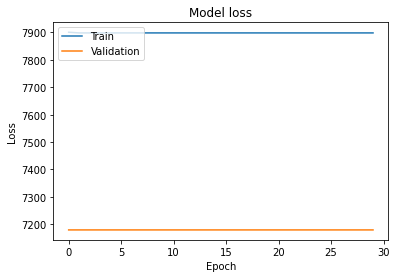

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [0]:
model.evaluate_generator(validation_generator, steps=STEP_SIZE_VAL)

7179.52734375

In [0]:
model.save('model.h5')

In [0]:
# for idx, row in df.iloc[lucky_test_samples].iterrows():    
#     img = cv2.resize(cv2.imread("Indian Number Plates/" + row[0]) / 255.0, dsize=(WIDTH, HEIGHT))
#     y_hat = model.predict(img.reshape(1, WIDTH, HEIGHT, 3)).reshape(-1) * WIDTH
    
#     xt, yt = y_hat[0], y_hat[1]
#     xb, yb = y_hat[2], y_hat[3]
    
#     img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2RGB)
#     image = cv2.rectangle(img, (xt, yt), (xb, yb), (0, 0, 255), 1)
#     plt.imshow(image)
#     plt.show()

In [0]:
# from google.colab import files
# from tensorflow.keras.preprocessing import image

Saving 12.jpg to 12 (1).jpg
Saving download.jpg to download (1).jpg
Saving young-man-buying-clothes-shop-21771372.jpg to young-man-buying-clothes-shop-21771372 (1).jpg


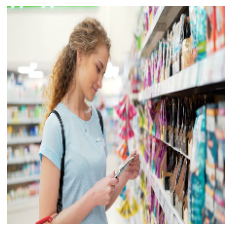

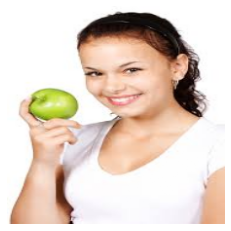

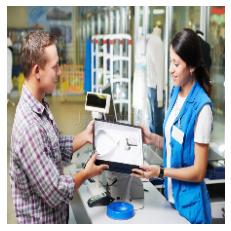

In [0]:
# uploaded= files.upload()

# for fn in uploaded.keys():
#   # predict image
#   path='/content/' + fn
#   img = cv2.resize(cv2.imread(path) / 255.0, dsize=(224,224))
  
#   y_hat=  model.predict(img.reshape(1, 224, 224, 3)).reshape(-1) * 224
#   xt, yt = y_hat[0], y_hat[1]
#   xb, yb = y_hat[2], y_hat[3]
  
#   img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2RGB)
#   image = cv2.rectangle(img, (xt, yt), (xb, yb), (0, 0, 255), 1)
#   plt.axis('off')
#   plt.imshow(image)
#   plt.show()
  